## Prediction Model
2022.09.30

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True )

In [3]:
# statsmodels 사용하기 위해서는 freq 가 설정되어 있어야함
df.index.freq = 'MS'

In [6]:
df.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### 01. split data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [27]:
train_data = df.iloc[:109]  #.LOC[:'1940-01-01']
test_data = df.iloc[108:]

### 02. fitting model

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [28]:
fitted_model = ExponentialSmoothing(
    train_data['Thousands of Passengers'], 
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit()

In [29]:
# 기간의 기준은 달(Month)
test_predictions = fitted_model.forecast(36)

In [30]:
test_predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379217
1958-07-01    502.248555
1958-08-01    490.986945
1958-09-01    424.051079
1958-10-01    365.391637
1958-11-01    318.392247
1958-12-01    360.320760
1959-01-01    369.905595
1959-02-01    359.903246
1959-03-01    422.128280
1959-04-01    412.508717
1959-05-01    421.370055
1959-06-01    492.003332
1959-07-01    545.035928
1959-08-01    532.814924
1959-09-01    460.176682
1959-10-01    396.519947
1959-11-01    345.516602
1959-12-01    391.017074
1960-01-01    401.418456
1960-02-01    390.563991
1960-03-01    458.090077
1960-04-01    447.651008
1960-05-01    457.267257
1960-06-01    533.917899
1960-07-01    591.468428
1960-08-01    578.206296
1960-09-01    499.379885
1960-10-01    430.300128
1960-11-01    374.951725
1960-12-01    424.328456
1961-01-01    435.615950
Freq: MS, dtype: float64

### 03. draw plot

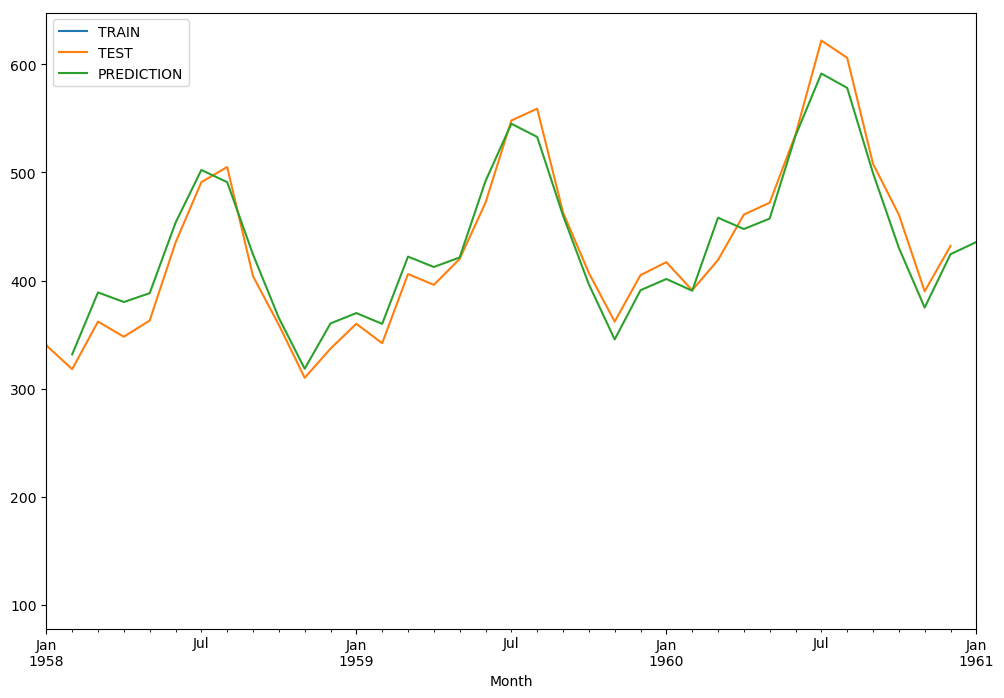

In [35]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
# test_predictions.plot(legend=True, label='PREDICTION')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

### 04. evaluation

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [37]:
mean_absolute_error(test_data, test_predictions)

46.30290453876919

In [38]:
mean_squared_error(test_data, test_predictions)

3075.328464707026

In [40]:
# 평균 제곱근 오차가 실제 데이터의 표준편차(std)보다 작은 것을 확인 가능
np.sqrt(mean_squared_error(test_data, test_predictions))

55.45564411948549

### 05.prediction

In [41]:
# evaluation 과정을 통해 현재의 모델에 만족하기로 해서, 이제는 예측 시작
final_model = ExponentialSmoothing(
    df['Thousands of Passengers'], 
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit()

In [42]:
forecast_predictions = final_model.forecast(36)

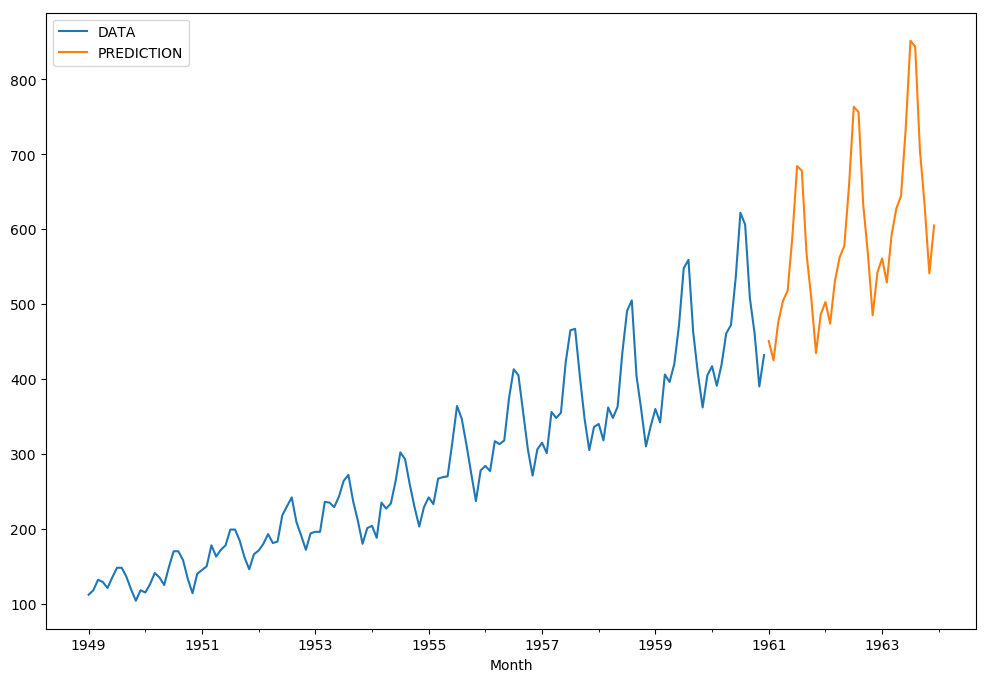

In [45]:
df['Thousands of Passengers'].plot(legend=True, label='DATA', figsize=(12,8))
forecast_predictions.plot(legend=True, label='PREDICTION', figsize=(12,8))


### bonus

In [48]:
df2 = pd.read_csv('samples.csv', index_col=0, parse_dates=True )

In [49]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


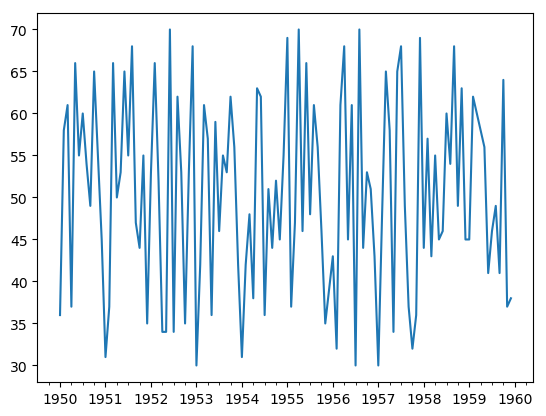

In [51]:
# 추세나 계절성이 보이지 않는 정상 데이터
df2['a'].plot()

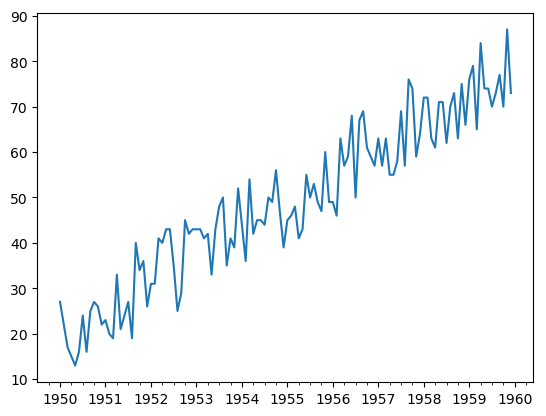

In [52]:
# 추세가 보이는 비정상 데이터
df2['b'].plot()

In [54]:
from statsmodels.tsa.statespace.tools import diff

In [57]:
# 1차 차분
# df2['b'] - df2['b'].shift(1)
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
1950-07-01     8.0
1950-08-01    -8.0
1950-09-01     9.0
1950-10-01     2.0
1950-11-01    -1.0
1950-12-01    -4.0
1951-01-01     1.0
1951-02-01    -3.0
1951-03-01    -1.0
1951-04-01    14.0
1951-05-01   -12.0
1951-06-01     3.0
1951-07-01     3.0
1951-08-01    -8.0
1951-09-01    21.0
1951-10-01    -6.0
1951-11-01     2.0
1951-12-01   -10.0
1952-01-01     5.0
1952-02-01     0.0
1952-03-01    10.0
1952-04-01    -1.0
1952-05-01     3.0
1952-06-01     0.0
1952-07-01    -8.0
              ... 
1957-07-01    11.0
1957-08-01   -12.0
1957-09-01    19.0
1957-10-01    -2.0
1957-11-01   -15.0
1957-12-01     5.0
1958-01-01     8.0
1958-02-01     0.0
1958-03-01    -9.0
1958-04-01    -2.0
1958-05-01    10.0
1958-06-01     0.0
1958-07-01    -9.0
1958-08-01     8.0
1958-09-01     3.0
1958-10-01   -10.0
1958-11-01    12.0
1958-12-01    -9.0
1959-01-01    10.0
1959-02-01     3.0
1959-03-01   -14.0
1959-04-01  

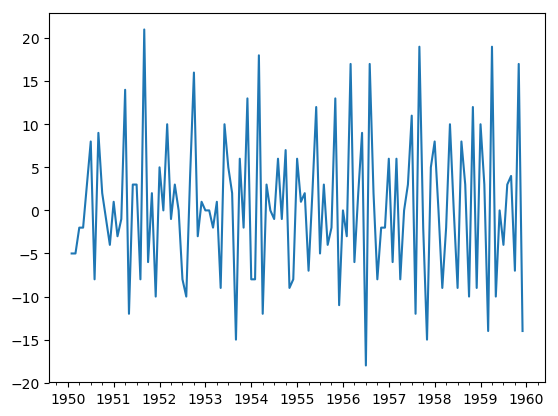

In [58]:
# 차분을 통해, 정상 데이터로 변화한 df2['b']
diff(df2['b'], k_diff=1).plot()